# Deep Learning Classification
Loosely following [this](http://machinelearningmastery.com/binary-classification-tutorial-with-the-keras-deep-learning-library/) tutorial.

Got data from [here](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=5&ved=0ahUKEwjLuYHC7JjTAhUI_mMKHY_KAnQQFgg3MAQ&url=http%3A%2F%2Fastro.temple.edu%2F~alan%2Fsonar_all-data.txt&usg=AFQjCNENngJvGLEh5PRL5NJbqO2HiBUodg&sig2=jzebV41YmPuZDoLP1hzZnw&bvm=bv.152174688,d.cGc)

In [1]:
from time import time

import numpy as np
import pandas
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
seed = 42
np.random.seed(seed)

In [3]:
# load dataset
dataframe = pandas.read_csv("data/sonar_all-data.csv", header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]

In [4]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [5]:
# 60 node baseline model
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(60, input_dim=60, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [6]:
# 30 node single layer
def dim_reduction():
    # create model
    model = Sequential()
    model.add(Dense(30, input_dim=60, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [7]:
# 10 node double layer
def double_ten():
    # create model
    model = Sequential()
    model.add(Dense(10, input_dim=60, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [8]:
# 10 node double layer with dropout
def double_ten_w_dropout():
    # create model
    model = Sequential()
    model.add(Dense(10, input_dim=60, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(.25))
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(.25))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [9]:
# 10 node double layer with dropout
def double_thirty_w_dropout():
    # create model
    model = Sequential()
    model.add(Dense(30, input_dim=60, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(.25))
    model.add(Dense(30, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(.25))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [10]:
def triple_thirty_w_dropout():
    # create model
    model = Sequential()
    model.add(Dense(30, input_dim=60, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(.25))
    model.add(Dense(30, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(.25))
    model.add(Dense(30, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(.25))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [11]:
def n_thirty_w_dropout(n):
    # create model
    model = Sequential()
    model.add(Dense(30, input_dim=60, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(.25))
    for i in range(n-1):
        model.add(Dense(30, kernel_initializer='normal', activation='relu'))
        model.add(Dropout(.25))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [12]:
def five_thirty_w_dropout():
    return n_thirty_w_dropout(5)

In [16]:
def run_model(build_fn, description):
    # evaluate reduced dimension model with standardized dataset
    t_start = time()
    estimators = []
    estimators.append(('standardize', StandardScaler()))
    estimators.append(('mlp', KerasClassifier(build_fn=build_fn, epochs=100, batch_size=5, verbose=0)))
    pipeline = Pipeline(estimators)
    kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)
    results = cross_val_score(pipeline, X, encoded_Y, cv=kfold, 
                              scoring='roc_auc')
    print("%s: auc=%.4f +/- %.4f)" % (description, results.mean(), results.std()))
    print("Train time: ", time()-t_start)

In [17]:
def plot_roc_curve(y_true, y_predict, label=None):
    """
    A helper function to hold boilerplate for plotting
    the ROC curve of a model.
    If iterating over multiple lines, then pass a value
    for 'label'
    """
    fpr, tpr, thresholds = roc_curve(y_true, y_predict)
    plt.plot(fpr, tpr, label=label)
    plt.title('ROC curve', fontsize=16)
    plt.xlabel('False Positive Rate', fontsize=14)
    if label:
        plt.legend(loc=4)
    _ = plt.ylabel('True Positive Rate', fontsize=14)

In [18]:
run_model(create_baseline, "Baseline, single layer of 60 nodes")

Baseline, single layer of 60 nodes: auc=0.9211 +/- 0.0057)
Train time:  17.37608289718628


In [41]:
run_model(dim_reduction, "Single layer of 30 nodes")

Single layer of 30 nodes: 82.71% (2.25%)
Train time:  29.889158010482788


In [42]:
run_model(double_ten, 'Double layer of 10 nodes each')

Double layer of 10 nodes each: 81.73% (1.43%)
Train time:  31.696619033813477


In [43]:
run_model(double_ten_w_dropout, "Double layer of 10 nodes each with .25 dropout")

Double layer of 10 nodes each with .25 dropout: 81.73% (0.63%)
Train time:  38.96178102493286


In [45]:
run_model(double_thirty_w_dropout, "Double layer of 30 nodes each with .25 dropout")

Double layer of 30 nodes each with .25 dropout: 81.73% (1.79%)
Train time:  37.72720694541931


In [47]:
run_model(double_thirty_w_dropout, "Triple layer of 30 nodes each with .25 dropout")

Triple layer of 30 nodes each with .25 dropout: 82.70% (1.99%)
Train time:  38.89444303512573


In [89]:
run_model(five_thirty_w_dropout, "Five layers of 30 nodes each and 25% dropout")

Five layers of 30 nodes each and 25% dropout: 84.13% (2.37%)
Train time:  55.86919808387756


## Sanity Check

In [67]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, encoded_Y)

In [84]:
# evaluate reduced dimension model with standardized dataset
t_start = time()
model = double_thirty_w_dropout()
model.fit(X_train, y_train, epochs=100, verbose=False)
y_pred = model.predict(X_test).reshape((X_test.shape[0],))
#print("%s: %.2f%% (%.2f%%)" % ("The triple 30!", results.mean()*100, results.std()*100))
print("Train time: ", time()-t_start)
print("ROC AUC: ", roc_auc_score(y_test, y_pred))
plot_roc_curve(y_test, y_pred)

Train time:  4.9598212242126465
ROC AUC:  0.918639053254


Train time:  7.101886987686157
ROC AUC:  0.949704142012


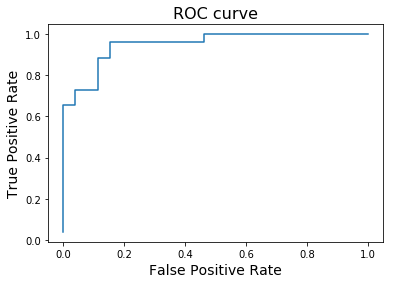

In [87]:
# evaluate reduced dimension model with standardized dataset
t_start = time()
model = n_thirty_w_dropout(5)
model.fit(X_train, y_train, epochs=100, verbose=False)
y_pred = model.predict(X_test).reshape((X_test.shape[0],))
#print("%s: %.2f%% (%.2f%%)" % ("The triple 30!", results.mean()*100, results.std()*100))
print("Train time: ", time()-t_start)
print("ROC AUC: ", roc_auc_score(y_test, y_pred))
plot_roc_curve(y_test, y_pred)